In [1]:
#import kniznic
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
warnings.filterwarnings("ignore")

#uprava formatu
np.set_printoptions(suppress=True, precision = 5)
pd.options.display.float_format='{:,.5f}'.format





In [2]:
df1=pd.read_csv(r"framingham.csv")
df1

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.00000,0,0.00000,0.00000,0,0,0,195.00000,106.00000,70.00000,26.97000,80.00000,77.00000,0
1,0,46,2.00000,0,0.00000,0.00000,0,0,0,250.00000,121.00000,81.00000,28.73000,95.00000,76.00000,0
2,1,48,1.00000,1,20.00000,0.00000,0,0,0,245.00000,127.50000,80.00000,25.34000,75.00000,70.00000,0
3,0,61,3.00000,1,30.00000,0.00000,0,1,0,225.00000,150.00000,95.00000,28.58000,65.00000,103.00000,1
4,0,46,3.00000,1,23.00000,0.00000,0,0,0,285.00000,130.00000,84.00000,23.10000,85.00000,85.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.00000,1,1.00000,0.00000,0,1,0,313.00000,179.00000,92.00000,25.97000,66.00000,86.00000,1
4234,1,51,3.00000,1,43.00000,0.00000,0,0,0,207.00000,126.50000,80.00000,19.71000,65.00000,68.00000,0
4235,0,48,2.00000,1,20.00000,NaN,0,0,0,248.00000,131.00000,72.00000,22.00000,84.00000,86.00000,0
4236,0,44,1.00000,1,15.00000,0.00000,0,0,0,210.00000,126.50000,87.00000,19.16000,86.00000,NaN,0


In [3]:
df1.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.00000,0,0.00000,0.00000,0,0,0,195.00000,106.00000,70.00000,26.97000,80.00000,77.00000,0
1,0,46,2.00000,0,0.00000,0.00000,0,0,0,250.00000,121.00000,81.00000,28.73000,95.00000,76.00000,0
2,1,48,1.00000,1,20.00000,0.00000,0,0,0,245.00000,127.50000,80.00000,25.34000,75.00000,70.00000,0
3,0,61,3.00000,1,30.00000,0.00000,0,1,0,225.00000,150.00000,95.00000,28.58000,65.00000,103.00000,1
4,0,46,3.00000,1,23.00000,0.00000,0,0,0,285.00000,130.00000,84.00000,23.10000,85.00000,85.00000,0


In [4]:
df1.sample(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3045,1,39,4.00000,1,15.00000,0.00000,0,0,0,208.00000,135.00000,80.00000,20.71000,70.00000,NaN,0
710,1,50,4.00000,1,25.00000,0.00000,0,0,0,215.00000,134.00000,80.00000,29.98000,67.00000,75.00000,0
1998,0,51,NaN,1,15.00000,0.00000,0,1,0,240.00000,180.00000,107.50000,25.33000,68.00000,80.00000,0
883,0,62,1.00000,0,0.00000,0.00000,0,1,0,174.00000,166.00000,89.00000,31.44000,83.00000,NaN,1
707,1,47,1.00000,1,30.00000,0.00000,0,0,0,143.00000,114.00000,79.00000,26.59000,69.00000,72.00000,1
3102,1,54,1.00000,1,30.00000,0.00000,0,1,0,177.00000,162.50000,99.50000,22.97000,65.00000,93.00000,1
3595,0,58,1.00000,1,10.00000,0.00000,0,1,0,252.00000,135.00000,84.00000,28.24000,85.00000,79.00000,0
2772,0,40,2.00000,1,9.00000,0.00000,0,0,0,240.00000,115.00000,72.00000,18.82000,80.00000,68.00000,0
2721,1,37,3.00000,1,20.00000,0.00000,0,0,0,205.00000,142.00000,80.00000,27.93000,100.00000,103.00000,0
605,0,64,2.00000,1,9.00000,0.00000,0,1,0,250.00000,145.00000,79.00000,25.16000,73.00000,86.00000,0


In [5]:
df1.tail(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.00000,1,1.00000,0.00000,0,1,0,313.00000,179.00000,92.00000,25.97000,66.00000,86.00000,1
4234,1,51,3.00000,1,43.00000,0.00000,0,0,0,207.00000,126.50000,80.00000,19.71000,65.00000,68.00000,0
4235,0,48,2.00000,1,20.00000,NaN,0,0,0,248.00000,131.00000,72.00000,22.00000,84.00000,86.00000,0
4236,0,44,1.00000,1,15.00000,0.00000,0,0,0,210.00000,126.50000,87.00000,19.16000,86.00000,NaN,0
4237,0,52,2.00000,0,0.00000,0.00000,0,0,0,269.00000,133.50000,83.00000,21.47000,80.00000,107.00000,0


In [6]:
df1.shape

(4238, 16)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [8]:
df1.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

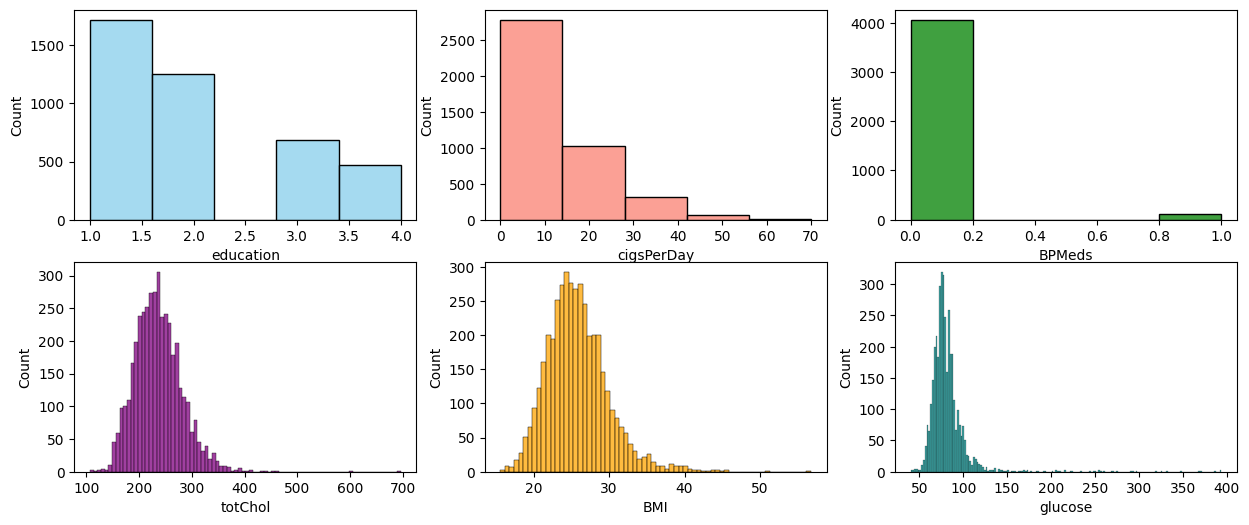

In [9]:
fig, ax = plt.subplots(2, 3, figsize=(15, 6))

sns.histplot(data=df1, x='education', bins=5, ax=ax[0, 0], color='skyblue')
sns.histplot(data=df1, x='cigsPerDay', bins=5, ax=ax[0, 1], color='salmon')
sns.histplot(data=df1, x='BPMeds', bins=5, ax=ax[0, 2], color='green')
sns.histplot(data=df1, x='totChol', ax=ax[1, 0], color='purple')
sns.histplot(data=df1, x='BMI', ax=ax[1, 1], color='orange')
sns.histplot(data=df1, x='glucose', ax=ax[1, 2], color='teal')

plt.show()

In [10]:
#nulte hodnoty pre atribut pocet cigariet denne
df1['cigsPerDay'].isnull().sum()
df1['cigsPerDay'].describe()

count   4,209.00000
mean        9.00309
std        11.92009
min         0.00000
25%         0.00000
50%         0.00000
75%        20.00000
max        70.00000
Name: cigsPerDay, dtype: float64

In [11]:
df1['cigsPerDay']=df1['cigsPerDay'].fillna(value=df1['cigsPerDay'].mean())

In [12]:
df1['cigsPerDay'].isnull().sum()

0

In [13]:
df1['education'].fillna(df1['education'].mean(), inplace=True)
df1['BPMeds'].fillna(df1['BPMeds'].mean(), inplace=True)
df1['totChol'].fillna(df1['totChol'].mean(), inplace=True)
df1['BMI'].fillna(df1['BMI'].mean(), inplace=True)
df1['glucose'].fillna(df1['glucose'].mean(), inplace=True)


In [14]:
df1.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          1
glucose            0
TenYearCHD         0
dtype: int64

In [15]:
df1.dropna(inplace=True)
df1.shape

(4237, 16)

In [16]:
df1.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [17]:
df1.duplicated().sum()

0

In [18]:
corr_with_target = df1.corrwith(df1['TenYearCHD'])
corr_with_target_dict = dict(corr_with_target)

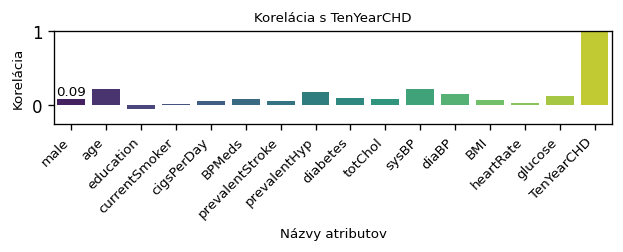

In [19]:
plt.figure(figsize=(6, 1), dpi=120)
ax = sns.barplot(x=[column for column, correlation in corr_with_target_dict.items()],
                 y=[correlation for column, correlation in corr_with_target_dict.items()],
                 palette='viridis')
plt.ylim(-0.25, 1)
ax.bar_label(ax.containers[0], fmt='%.2f', fontsize=8, color='black')
plt.title("Korelácia s TenYearCHD", fontsize=8)
plt.xlabel("Názvy atributov", fontsize=8)
plt.ylabel("Korelácia", fontsize=8)
plt.xticks(rotation=45, ha='right', fontsize=8) 
plt.show()


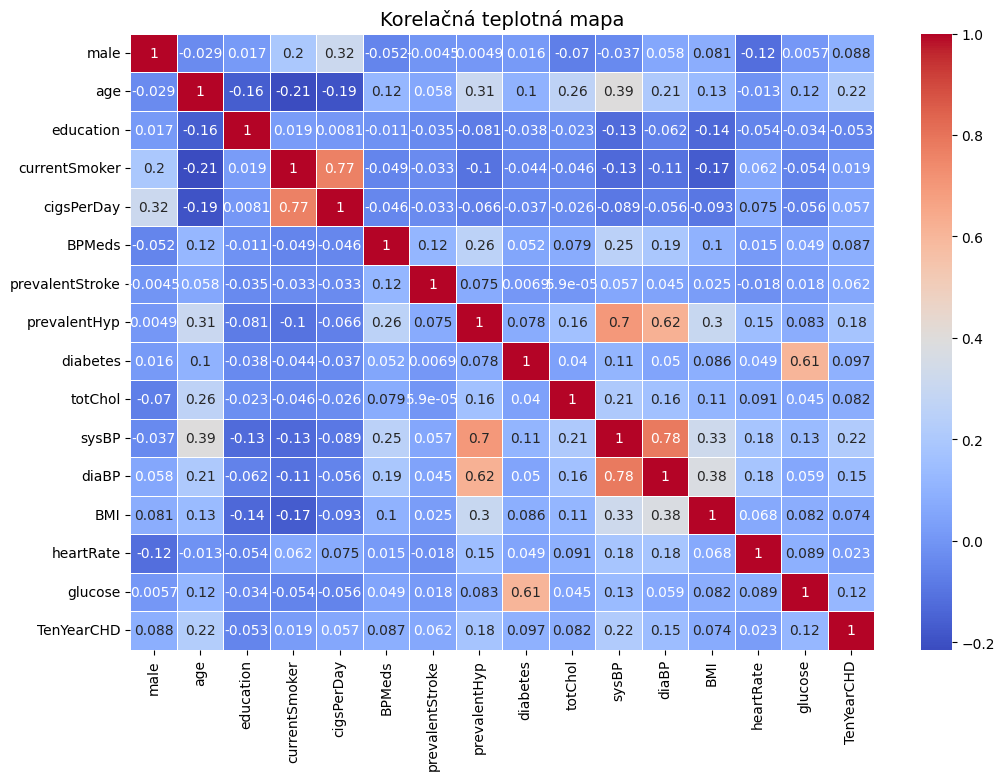

In [20]:
#matica korelacie
plt.figure(figsize=(12, 8))
corr = df1.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, linewidths=.5)
plt.title("Korelačná teplotná mapa", fontsize=14)
plt.show()

In [21]:
df1.drop(columns=["currentSmoker"],axis=1,inplace=True)

In [22]:
#definovanie cielovej premenej a vysvetlujúcich premených
y=df1['TenYearCHD']
X=df1.drop('TenYearCHD',axis=1)

In [23]:
X.shape,y.shape

((4237, 14), (4237,))

In [24]:
X_sc=MinMaxScaler().fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48)


In [27]:
logreg_model = LogisticRegression(C=0.01).fit(X_train, y_train)

In [28]:
#Kontrola presnosti - ACCURACY testovacieho súboru údajov
f"Skóre na testovacom súbore údajov je {logreg_model.score(X_test,y_test)}"


'Skóre na testovacom súbore údajov je 0.8466981132075472'

In [29]:
predict_probab=logreg_model.predict_proba(X_test)
predict_probab[:10]

array([[0.84172, 0.15828],
       [0.93831, 0.06169],
       [0.97813, 0.02187],
       [0.81783, 0.18217],
       [0.90103, 0.09897],
       [0.89393, 0.10607],
       [0.76987, 0.23013],
       [0.83809, 0.16191],
       [0.5714 , 0.4286 ],
       [0.93308, 0.06692]])

In [30]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
roc_auc_score(y_test,predict_probab[:,1])

0.6061044892503062

In [31]:
X_test_predicted=logreg_model.predict(X_test)
X_test_predicted[:10]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

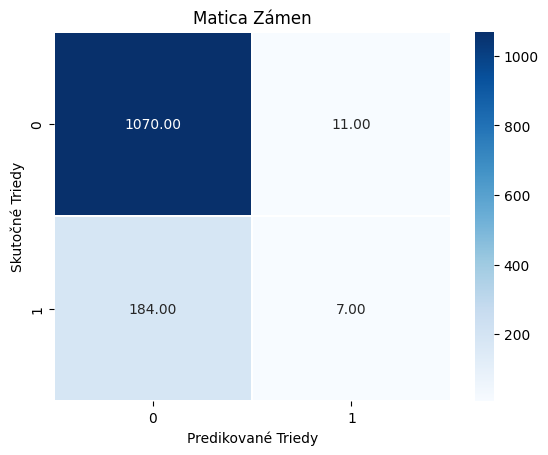

In [32]:
sns.heatmap(confusion_matrix(y_test, X_test_predicted), fmt=".2f", annot=True, lw=.2, cmap="Blues")
plt.xlabel("Predikované Triedy")
plt.ylabel("Skutočné Triedy")
plt.title("Matica Zámen")
plt.show()


In [33]:
print(classification_report(y_test,X_test_predicted))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1081
           1       0.39      0.04      0.07       191

    accuracy                           0.85      1272
   macro avg       0.62      0.51      0.49      1272
weighted avg       0.78      0.85      0.79      1272



In [34]:
print(X.shape, y.shape)

(4237, 14) (4237,)


In [35]:
import imblearn.over_sampling
from imblearn.over_sampling import SMOTE

In [36]:
# Aplikácia SMOTE na dáta
smote_data = SMOTE(sampling_strategy='minority')
Xsme, y = smote_data.fit_resample(X, y)

# Normalizácia dát
Xsme_sc = MinMaxScaler().fit_transform(Xsme)



In [37]:
X_train, X_test, y_train, y_test = train_test_split(Xsme_sc, y, shuffle=True, random_state=1)
# Vytvorenie a trénovanie modelu logistickej regresie
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [38]:
# Vyhodnotenie modelu
X_test_predicted = clf.predict(X_test)
predict_probab = clf.predict_proba(X_test)

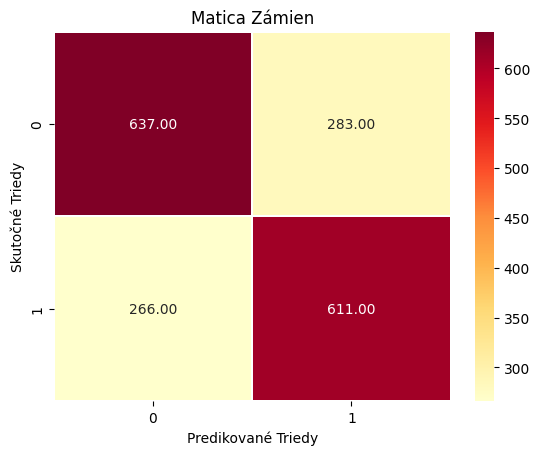

In [39]:
sns.heatmap(confusion_matrix(y_test, X_test_predicted), fmt=".2f", annot=True, lw=.2, cmap="YlOrRd")
plt.xlabel("Predikované Triedy")
plt.ylabel("Skutočné Triedy")
plt.title("Matica Zámien")
plt.show()

In [40]:
f"Skóre na testovacom súbore údajov je {logreg_model.score(X_test,y_test)}"

'Skóre na testovacom súbore údajov je 0.5742904841402338'

In [41]:
print(classification_report(y_test, X_test_predicted))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       920
           1       0.68      0.70      0.69       877

    accuracy                           0.69      1797
   macro avg       0.69      0.69      0.69      1797
weighted avg       0.69      0.69      0.69      1797



In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [43]:
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params,
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)

In [44]:
knn_clf.fit(X_train,y_train)
knn_clf.best_params_

{'n_neighbors': 1}

In [45]:
knn_predict = knn_clf.predict(X_test)

In [46]:
knn_accuracy = accuracy_score(y_test,knn_predict)
print(f"Použitím k-najbližších susedov dostaneme presnosť {knn_accuracy}")

Použitím k-najbližších susedov dostaneme presnosť 0.8452977184195882


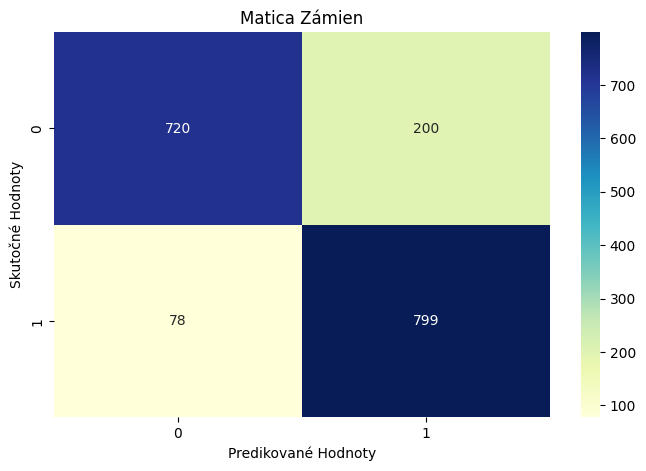

In [47]:
cm = confusion_matrix(y_test, knn_predict)
conf_matrix = pd.DataFrame(data=cm)

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Matica Zámien")
plt.xlabel("Predikované Hodnoty")
plt.ylabel("Skutočné Hodnoty")
plt.show()

In [48]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84       920
           1       0.80      0.91      0.85       877

    accuracy                           0.85      1797
   macro avg       0.85      0.85      0.84      1797
weighted avg       0.85      0.85      0.84      1797

